# PW02 Ex2
# Student dataset

## Students
- Flavia Pittet
- Fabio Vitali

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import random
import numpy as np

# Load a csv file from an url or pathname
def load_data(url):
    
    # Apply these names for each columns
    names = ['exam1', 'exam2', 'label']
    df = pd.read_csv(url, names=names)
    
    return df


df_train = load_data('./ex1-data-train.csv')
df_test = load_data('./ex1-data-test.csv')

print(df_train.head())
print(df_test.head())

       exam1      exam2  label
0  34.623660  78.024693      0
1  30.286711  43.894998      0
2  35.847409  72.902198      0
3  60.182599  86.308552      1
4  79.032736  75.344376      1
       exam1      exam2  label
0  39.196334  78.530294      0
1  40.448499  86.839470      1
2  65.571920  44.303497      0
3  79.648113  70.806564      1
4  66.260221  41.672703      0


## Plotting

Function will plot according to the columns **exam1** and **exam2** of the DataFrame

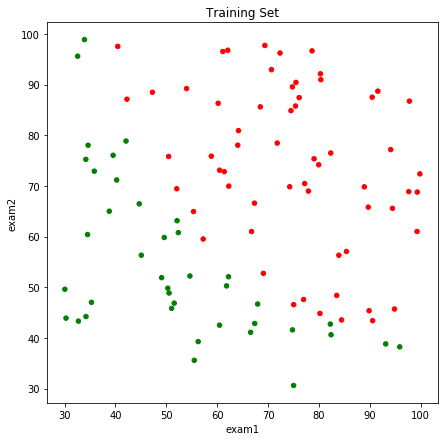

In [2]:
# Plot the 
def scatter_plot(df, labelName='label', title=''):
    results = [0,1]
    colors = ['green', 'red']
    for i in range(0,2):
        df.loc[df[labelName] == results[i],'color'] = colors[i]
        
    df.plot(title=title, figsize=(7,7), kind='scatter', x='exam1', y='exam2', c=df['color'])
    
scatter_plot(df_train, title='Training Set')

## Dummy recognition system

       exam1      exam2  label  truth  color
0  39.196334  78.530294      1      0    red
1  40.448499  86.839470      0      1  green
2  65.571920  44.303497      0      0  green
3  79.648113  70.806564      0      1  green
4  66.260221  41.672703      0      0  green


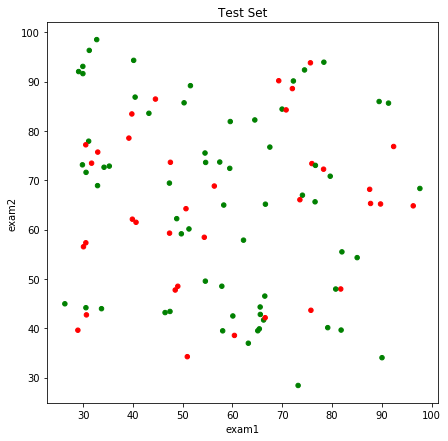

In [3]:
def dummy_reco(test_set):
    
    test_set['truth'] = test_set['label'] # We save the ground truth for later
    list_rand = [random.randint(0,1) for _ in range(test_set.shape[0])] # Not sure if best practice
    test_set = test_set.assign(label=list_rand)
    return test_set

df_test = dummy_reco(df_test)

scatter_plot(df_test, title='Test Set')
print(df_test.head())

## Computing performance 

In [4]:
def compute_perf(test_set):
    test_set['correct'] = (test_set['truth'] == test_set['label'])
    correct = test_set.sum()['label']
    return correct / test_set.shape[0]


print(compute_perf(df_test))

0.36


We observe that we have an average accuracy of ~0.5, which is expected for random predictions

## Introducing knn

In [5]:
class knn:
    def __init__(self):
        pass
    
    def train(self, training_set):
        self.inputs = training_set.loc[:,['exam1', 'exam2']]
        self.outputs = training_set['label']
        
    def predict(self, test_set, k=1):
        num_tests = test_set.shape[0]
        
        test_inputs = test_set.loc[:,['exam1', 'exam2']]
        
        yPred = np.zeros(num_tests)
        
        for i in range(num_tests):
           
            distance = (self.inputs - test_inputs.loc[i,:])**2
            
            distance = distance.sum('columns')**(1/2) # Sum the columns for each row and compute the sqrt of the result
            distance = distance.sort_values()
            
            # We get the k nearest points and get their index
            k_points = distance.iloc[0:k]
            index_min_array = k_points.index
            
            # We compute the mean value of the nearest labels, if it's greater than 0.5, then the predicted value is 1, otherwise it's 0
            yPred[i] = 1 if self.outputs[index_min_array].mean() > 0.5 else 0
            
            # Remark: In this implementation, if there are an euqal number of 0 and 1, 
            # then the mean value is 0.5, but our "mean value > 0.5" will predict a 0 (strictly positive comparison)

        return yPred

       

myKNN = knn()

myKNN.train(df_train)

for k in range(1,8):
    predictions = myKNN.predict(df_test,k)
    # We tests if the predictions are correct and then we sum up the True values
    corrects = (predictions == df_test['truth']).sum()
    print("k={}, performance={}".format(k, corrects/predictions.shape[0]))



k=1, performance=0.96
k=2, performance=0.94
k=3, performance=0.97
k=4, performance=0.91
k=5, performance=0.92
k=6, performance=0.91
k=7, performance=0.91


We can see with our tests that the best value for k is 3, with which we have the highest success rate (~97%)